Column names in df: ['Frame', '49.SG-196.O1', '83.OE1-196.O1', '49.SG-49.HG1', '196.O1-196.H1', '83.OE1-196.H1', '196.O1-49.HG1']
Matched breaking bond: 49.SG-49.HG1
Adding label: 49.SG-49.HG1 (Breaking)
Matched breaking bond: 196.O1-196.H1
Adding label: 196.O1-196.H1 (Breaking)
Matched forming bond: 83.OE1-196.H1
Adding label: 83.OE1-196.H1 (Forming)


Matched forming bond: 196.O1-49.HG1
Adding label: 196.O1-49.HG1 (Forming)


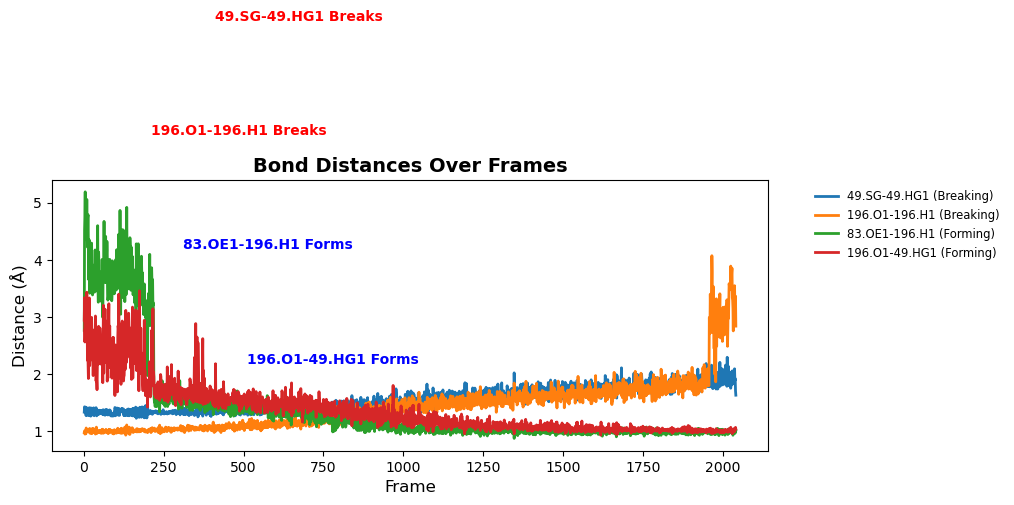

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
file_path = "output.csv"
df = pd.read_csv(file_path)

# Normalize column names (strip spaces)
df.columns = df.columns.str.strip()

# Updated bond classifications (matching actual column names)
bonds_breaking = ["196.O1-196.H1", "49.SG-49.HG1"]  # Adjust to match CSV format
bonds_forming = ["83.OE1-196.H1", "196.O1-49.HG1"]  # Adjust to match CSV format

# Define bond event frames (adjust based on actual data)
breaking_steps = {
    "196.O1-196.H1": 200,  # Frame number
    "49.SG-49.HG1": 400
}
forming_steps = {
    "83.OE1-196.H1": 300,
    "196.O1-49.HG1": 500
}

# Debug: Print DataFrame column names
print("Column names in df:", df.columns.tolist())

# Plot bond distances
plt.figure(figsize=(10, 6))  # Adjust figure size for publication quality
handles = []
labels = []

# Iterate through columns (excluding 'Frame' column)
for column in df.columns[1:]:  # Exclude 'Frame' column
    category = None

    # Check if column matches a bond-breaking event
    if column in bonds_breaking:
        category = "Breaking"
        print(f"Matched breaking bond: {column}")

    # Check if column matches a bond-forming event
    elif column in bonds_forming:
        category = "Forming"
        print(f"Matched forming bond: {column}")

    # If a match is found, plot the column
    if category:
        label = f"{column} ({category})"
        print(f"Adding label: {label}")  # Debugging step

        # Ensure there is actual data to plot
        if df[column].dropna().shape[0] > 0:
            handle, = plt.plot(df["Frame"], df[column], label=label, linewidth=2)
            handles.append(handle)
            labels.append(label)
        else:
            print(f"Skipping {column} as it has no valid data.")

# Debug: Check if any labels were added
if not handles:
    print("⚠️ No valid labels found for legend. Check column names!")

# Get max y-value for annotations (avoid empty dataframe issue)
max_y = max(df.iloc[:, 1:].max(), default=10)

# Dynamic Y-offset for annotations to avoid overlap
breaking_offset = 1
forming_offset = -1

# Add annotations for bond-breaking and bond-forming events
for bond, frame in breaking_steps.items():
    # Adjust y-position to avoid overlap with other annotations
    plt.text(frame + 10, max_y + breaking_offset, f"{bond} Breaks", color='red', fontsize=10, ha='left', fontweight='bold')
    breaking_offset += 2  # Increase the offset for subsequent annotations

for bond, frame in forming_steps.items():
    # Adjust y-position for forming events
    plt.text(frame + 10, max_y + forming_offset, f"{bond} Forms", color='blue', fontsize=10, ha='left', fontweight='bold')
    forming_offset -= 2  # Decrease the offset for subsequent annotations

# Labels and title with publication-style fonts
plt.xlabel("Frame", fontsize=12)
plt.ylabel("Distance (Å)", fontsize=12)
plt.title("Bond Distances Over Frames", fontsize=14, fontweight='bold')

# Explicitly set legend outside the plot to avoid overlap
if handles:
    plt.legend(handles, labels, loc="upper left", fontsize="small", bbox_to_anchor=(1.05, 1), frameon=False)  # Place legend outside the plot
else:
    print("⚠️ No valid legend items. Check bond names and data.")

# Adjust plot layout to make room for legend and avoid white space
plt.tight_layout(pad=0.1, h_pad=1.0, w_pad=1.0)  # Adjust padding for better spacing

# Save figure for publication
plt.savefig("bond_distances_plot.png", dpi=300, bbox_inches='tight', pad_inches=0.0)  # Reduced padding for saving

# Show plot
plt.show()
